![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Limpieza de datos para crear gráficos descriptivos y modelo de ML

Nos dan un dataset con información relativa da distintas películas y el número de likes que han recibido en Facebook y Twitter. Nos piden:

1. Preparar el dataset para crear un modelo de ML que nos permita predecir el número de likes a partir de las características de las películas.
2. Además del modelo, necesitaremos presentar algunos gráficos a nuestros stakeholders. Es necesario que la data este preparada para ello.
3. Identificar problemas graves en la data y comunicarlos lo antes posible.
4. Adicionalmente, nuestro stakeholder tiene "curiosidad" por algunas cifras:
    - Actores más repetidos en el dataset
    - Géneros de películas más comunes
    - Relación entre presupuesto y recaudación


## Leer datos

## Limpieza de datos

### Revisiones generales: `.columns`, `.index`, `.shape`

In [4156]:
import pandas as pd
import numpy as np

df_imdb = pd.read_csv('imdb_clase.csv', sep =';', index_col = 0).reset_index(drop=True)


In [4157]:
pd.reset_option('display.max_rows')

In [4158]:
df_imdb.columns

Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes', 'movie_twitter_likes'],
      dtype='object')

In [4159]:
df_imdb.index

RangeIndex(start=0, stop=99, step=1)

In [4160]:
df_imdb.shape

(99, 14)

### Ver algunas observaciones: `.head()`, `.tail()`, `.sample()`

In [4161]:
df_imdb.head().T

,0,1,2,3,4
color,Color,Color,color,Color,Color
director_name,Martin Scorsese,Shane Black,Quentin Tarantino,Kenneth Lonergan,Peter Jackson
duration,240,195,187,186,186
gross,"$116,866,727.00","$408,992,272.00","$54,116,191.00","$46,495.00","$258,355,354.00"
genres,Biography|Comedy|Crime|Drama,Action|Adventure|Sci-Fi,Crime|Drama|Mystery|Thriller|Western,Drama,Adventure|Fantasy
movie_title,the wolf of wall street,iron man 3,the hateful eight,margaret,the hobbit: the desolation of smaug
title_year,2013,2013,2015,2011,2013
language,English,English,English,English,English
country,USA,USA,USA,usa,USA
budget,"USD 100,000,000.00","USD 200,000,000.00","USD 44,000,000.00","USD 14,000,000.00","USD 225,000,000.00"


In [4162]:
df_imdb.sample(5)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
61,Color,Timur Bekmambetov,141,$nan,Adventure|Drama|History,ben-hur,2016,English,USA,"USD 100,000,000.00",6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000
73,Color,Tate Taylor,139,"$30,513,940.00",Biography|Drama|Music,get on up,2014,English,USA,"USD 30,000,000.00",6.9,"Tika Sumpter,Josh Hopkins,Aunjanue Ellis",11000,1000
15,NaN,Richard Linklater,165,"$25,359,200.00",Drama,boyhood,2014,English,USA,"USD 4,000,000.00",8.0,"Ellar Coltrane,Lorelei Linklater,Libby Villari",92000,1000
17,Color,Michael Bay,165,"$245,428,137.00",Action|Adventure|Sci-Fi,transformers: age of extinction,2014,English,USA,"USD 210,000,000.00",5.7,"Bingbing Li,Sophia Myles,Kelsey Grammer",56000,1000
41,Color,NaN,147,"$407,197,282.00",Action|Adventure|Sci-Fi,captain america: civil war,2016,English,USA,"USD 250,000,000.00",8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000,1000


### Describir dataset: `info()`, `describe()`

In [4163]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 99 non-null     object 
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                99 non-null     object 
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
 13  movie_twitter_likes   99 non-null     int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 11.0+ KB


In [4164]:
df_imdb.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,99.0,155.494949,72.797927,-50.0,138.50,143.0,155.00,650.0
title_year,99.0,1944.010101,393.848787,-1000.0,2012.00,2013.0,2014.00,2030.0
imdb_score,99.0,6.892929,1.925514,-7.5,6.55,7.2,7.85,8.8
movie_facebook_likes,99.0,66045.707071,58108.860365,0.0,25000.00,54000.0,85500.00,349000.0
movie_twitter_likes,99.0,1000.000000,0.000000,1000.0,1000.00,1000.0,1000.00,1000.0


### Valores faltantes: `.isnull()`, `.isna()`

In [4165]:
df_imdb.isnull().sum()

color                   11
director_name           11
duration                 0
gross                    0
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   0
imdb_score               0
actors                   0
movie_facebook_likes     0
movie_twitter_likes      0
dtype: int64

In [4166]:
df_imdb.isna().mean()*100

color                   11.111111
director_name           11.111111
duration                 0.000000
gross                    0.000000
genres                   1.010101
movie_title              0.000000
title_year               0.000000
language                 0.000000
country                  0.000000
budget                   0.000000
imdb_score               0.000000
actors                   0.000000
movie_facebook_likes     0.000000
movie_twitter_likes      0.000000
dtype: float64

### Quitar filas duplicadas: `.duplicated()`. `.drop_duplicates()`

In [4167]:
df_imdb.duplicated().sum()

5

In [4168]:
# Tienes que poner el argumento keep False para ver todos los duplicados, sino solo te enseña uno de cada duplicado.

df_imdb = df_imdb[~df_imdb.duplicated()]


## Tratamiento de columnas

Dylan:

- `color`
- `director_name`
- `gross`
- `duration`

Todos:
- `movie_title`
- `title_year`
- `movie_twitter_likes`
- `imdb_score`
- `country`
- `language`
- `actors`
- `movie_facebook_likes`


### Columna `color`

In [4169]:
df_imdb['color'].value_counts(dropna=False)

Color               81
NaN                 11
color                1
 Black and White     1
Name: color, dtype: int64

In [4170]:

df_imdb['color'] = df_imdb['color'].str.strip().str.capitalize()


In [4171]:
df_imdb['color'].unique()

array(['Color', nan, 'Black and white'], dtype=object)

In [4172]:
df_imdb[df_imdb['color'].isna()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
5,NaN,NaN,183,"$330,249,062.00",Action|Adventure|Sci-Fi,batman v superman: dawn of justice,202,English,USA,"USD 250,000,000.00",6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000,1000
10,NaN,Tom Tykwer,172,"$27,098,580.00",Drama|Sci-Fi,cloud atlas,2012,English,Germany,"USD 102,000,000.00",-7.5,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000,1000
15,NaN,Richard Linklater,165,"$25,359,200.00",Drama,boyhood,2014,English,USA,"USD 4,000,000.00",8.0,"Ellar Coltrane,Lorelei Linklater,Libby Villari",92000,1000
18,NaN,Christopher Nolan,164,"$448,130,642.00",Action|Thriller,the dark knight rises,2012,English,USA,"USD 250,000,000.00",8.5,"Tom Hardy,Christian Bale,Joseph Gordon-Levitt",164000,1000
56,NaN,NaN,143,$nan,Drama|Horror|Thriller,the ridges,2011,English,USA,"USD 17,350.00",3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33,1000
65,NaN,Oliver Stone,141,"$47,307,550.00",Crime|Drama|Thriller,savages,2012,English,USA,"USD 45,000,000.00",6.5,"Demián Bichir,Shea Whigham,Gary Stretch",28000,1000
74,NaN,Terrence Malick,139,"$13,303,319.00",Drama|Fantasy,the tree of life,2011,English,USA,"USD 32,000,000.00",6.7,"Brad Pitt,Tye Sheridan,Fiona Shaw",39000,1000
76,NaN,Robert Zemeckis,138,"$93,749,203.00",Drama|Thriller,flight,2012,English,USA,"USD 31,000,000.00",7.3,"Denzel Washington,Bruce Greenwood,Nadine Velaz...",64000,1000
80,NaN,James Mangold,138,"$132,550,960.00",Action|Adventure|Sci-Fi|Thriller,the wolverine,2013,English,USA,"USD 120,000,000.00",6.7,"Hugh Jackman,Tao Okamoto,Rila Fukushima",68000,1000
83,NaN,Walter Salles,137,"$717,753.00",Adventure|Drama,on the road,2012,English,France,"USD 25,000,000.00",6.1,"Kristen Stewart,Viggo Mortensen,Kirsten Dunst",27000,1000


In [4173]:
df_imdb.loc[df_imdb['color'].isna(), 'color']= 'Color'
df_imdb.color.value_counts()

Color              93
Black and white     1
Name: color, dtype: int64

In [4174]:
assert df_imdb['color'].isna().sum() == 0


In [4175]:
assert sorted(df_imdb['color'].unique()) == ['Black and white','Color']

### Columna `director_name`

In [4176]:
df_imdb['director_name'].value_counts(dropna = False)

NaN                  11
Michael Bay           3
Peter Jackson         3
Christopher Nolan     3
Ridley Scott          3
                     ..
Adam McKay            1
Zack Snyder           1
Baz Luhrmann          1
Kenneth Lonergan      1
Clint Eastwood        1
Name: director_name, Length: 64, dtype: int64

In [4177]:
#Cambiar nulos por no info
df_imdb.loc[df_imdb['director_name'].isna(),'director_name'] = 'No info available'
df_imdb['director_name'].value_counts(dropna = False)



No info available    11
Michael Bay           3
Peter Jackson         3
Christopher Nolan     3
Ridley Scott          3
                     ..
Adam McKay            1
Zack Snyder           1
Baz Luhrmann          1
Kenneth Lonergan      1
Clint Eastwood        1
Name: director_name, Length: 64, dtype: int64

In [4178]:
#df_imdb['director_name'][df_imdb['director_name'].str.len() < 8].value_counts()
df_imdb.loc[df_imdb['director_name'].str.len()<15,'director_name'].value_counts()


Peter Jackson     3
Michael Bay       3
Ridley Scott      3
Tate Taylor       2
Joss Whedon       2
Sam Mendes        2
Tom Hooper        2
Marc Webb         2
Bryan Singer      2
James Mangold     1
James Wan         1
Gavin O'Connor    1
Gary Ross         1
Rob Marshall      1
Walter Salles     1
Anthony Russo     1
David Dobkin      1
Adam Shankman     1
Tony Gilroy       1
Steve McQueen     1
David Ayer        1
Ryan Murphy       1
Shane Black       1
Oliver Stone      1
Baz Luhrmann      1
Zack Snyder       1
Adam McKay        1
Jay Oliva         1
David Fincher     1
Gore Verbinski    1
Mike Leigh        1
Nan               1
F. Gary Gray      1
Null              1
Tom Tykwer        1
Edward Hall       1
Clint Eastwood    1
Name: director_name, dtype: int64

In [4179]:
df_imdb.director_name.str.strip().isin(['Null', 'Nan']).sum()

2

In [4180]:
df_imdb.loc[df_imdb.director_name.str.strip().isin(['Null', 'Nan']), 'director_name'] = 'No info available'

In [4181]:
df_imdb['director_name'].value_counts()

No info available    13
Peter Jackson         3
Christopher Nolan     3
Ridley Scott          3
Michael Bay           3
                     ..
Adam McKay            1
Zack Snyder           1
Baz Luhrmann          1
Justin Chadwick       1
Clint Eastwood        1
Name: director_name, Length: 62, dtype: int64

### Columna `gross`

In [4182]:

df_imdb.gross.value_counts()


$nan               6
$148,775,460.00    2
$115,603,980.00    2
$116,866,727.00    1
$80,574,010.00     1
                  ..
$3,958,500.00      1
$182,204,440.00    1
$65,007,045.00     1
$228,430,993.00    1
$47,034,272.00     1
Name: gross, Length: 87, dtype: int64

In [4183]:
df_imdb.gross.str[0].value_counts(dropna=False)

$    94
Name: gross, dtype: int64

In [4184]:
df_imdb['gross'].isna().any()

False

In [4185]:
assert df_imdb['gross'].str[0].count() == df_imdb['gross'].count()

In [4186]:
df_imdb['gross'].str[1:].count()

94

In [4187]:
df_imdb['gross'] = df_imdb['gross'].str[1:]

In [4188]:
df_imdb['gross'] = df_imdb.gross.str.replace(',', '')

In [4189]:
pd.set_option("display.max_rows", 20)
df_imdb['gross'] = df_imdb.gross.astype(float)

<AxesSubplot:>

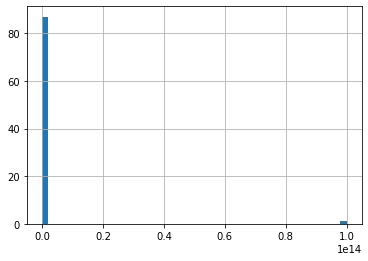

In [4190]:
df_imdb.gross.hist(bins = 50)

In [4191]:
df_imdb.gross.describe()

count    8.800000e+01
mean     1.136505e+12
std      1.066002e+13
min     -9.293900e+04
25%      4.158910e+07
50%      1.061603e+08
75%      2.298020e+08
max      1.000000e+14
Name: gross, dtype: float64

In [4192]:
df_imdb['gross'].value_counts(dropna = False)

NaN            6
148775460.0    2
115603980.0    2
116866727.0    1
80574010.0     1
              ..
3958500.0      1
182204440.0    1
65007045.0     1
228430993.0    1
47034272.0     1
Name: gross, Length: 87, dtype: int64

In [4193]:
df_imdb.loc[(df_imdb.gross == 'Nan') | (df_imdb.gross == 'Null'), 'gross'] = np.nan

In [4194]:
recaudacion_mediana = df_imdb.gross.median()
recaudacion_mediana


106160295.0

In [4195]:
df_imdb.loc[df_imdb.gross.isna(), 'gross'] = recaudacion_mediana

In [4196]:
df_imdb['gross'] = pd.to_numeric(df_imdb['gross'], downcast= 'integer')

In [4197]:
df_imdb.describe

<bound method NDFrame.describe of     color      director_name  duration      gross  \
0   Color    Martin Scorsese       240  116866727   
1   Color        Shane Black       195  408992272   
2   Color  Quentin Tarantino       187   54116191   
3   Color   Kenneth Lonergan       186      46495   
4   Color      Peter Jackson       186  258355354   
..    ...                ...       ...        ...   
94  Color      Steve McQueen       134   56667870   
95  Color   Richard J. Lewis       134    7501404   
96  Color    Paul Greengrass       134  107100855   
97  Color         David Ayer       134   85707116   
98  Color     Clint Eastwood         5   47034272   

                                  genres                          movie_title  \
0           Biography|Comedy|Crime|Drama              the wolf of wall street   
1                Action|Adventure|Sci-Fi                           iron man 3   
2   Crime|Drama|Mystery|Thriller|Western                    the hateful eight   
3    

<AxesSubplot:>

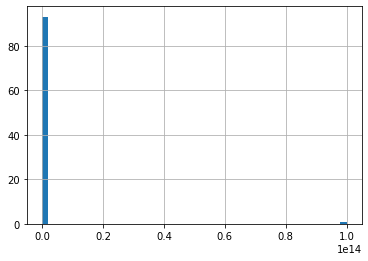

In [4198]:
df_imdb.gross.hist(bins=50)

In [4199]:
df_imdb[df_imdb.gross == df_imdb.gross.min()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
92,Color,Sadyk Sher-Niyaz,135,-92939,Action|Biography|Drama|History,queen of the mountains,2014,English,Kyrgyzstan,"USD 1,400,000.00",8.7,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0,1000


In [4200]:
df_imdb.loc[(df_imdb.gross > 1e9), 'gross'] = recaudacion_mediana

In [4201]:
df_imdb[df_imdb.gross == df_imdb.gross.max()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
8,Color,Joss Whedon,173,623279547,Action|Adventure|Sci-Fi,the avengers,2012,English,USA,"USD 220,000,000.00",8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000,1000


In [4202]:
df_imdb.loc[(df_imdb.gross < 0), 'gross'] = recaudacion_mediana

### Columna `genres`


In [4203]:
df_imdb.genres

0             Biography|Comedy|Crime|Drama
1                  Action|Adventure|Sci-Fi
2     Crime|Drama|Mystery|Thriller|Western
3                                    Drama
4                        Adventure|Fantasy
                      ...                 
94                 Biography|Drama|History
95                            Comedy|Drama
96                Biography|Drama|Thriller
97                        Action|Drama|War
98           Biography|Drama|Music|Musical
Name: genres, Length: 94, dtype: object

In [4204]:
df_imdb['genres'].isna().sum()

1

In [4205]:
df_imdb[df_imdb['genres'].isna()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
12,Color,Christopher Spencer,170,59696176,NaN,son of god,2014,English,USA,"USD 22,000,000.00",5.6,"Roma Downey,Amber Rose Revah,Darwin Shaw",15000,1000


In [4206]:
df_imdb.loc[df_imdb['genres'].isna(),'genres'] = 'Drama'

In [4207]:
df_imdb['genres'].isna().sum()

0

In [4208]:
df_imdb['genres'].value_counts(dropna = False)

Action|Adventure|Sci-Fi          9
Drama                            6
Crime|Drama|Thriller             5
Biography|Drama|History          4
Adventure|Fantasy                3
                                ..
Comedy|Drama|Romance             1
Adventure|Sci-Fi|Thriller        1
Action|Drama|Thriller|War        1
Comedy                           1
Biography|Drama|Music|Musical    1
Name: genres, Length: 56, dtype: int64

In [4209]:
#df_imdb['genres'] = df_imdb['genres'].str.split('|')
df_imdb.explode('genres')

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,116866727,Biography|Comedy|Crime|Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,408992272,Action|Adventure|Sci-Fi,iron man 3,2013,English,USA,"USD 200,000,000.00",7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
2,Color,Quentin Tarantino,187,54116191,Crime|Drama|Mystery|Thriller|Western,the hateful eight,2015,English,USA,"USD 44,000,000.00",7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000
3,Color,Kenneth Lonergan,186,46495,Drama,margaret,2011,English,usa,"USD 14,000,000.00",6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,1000
4,Color,Peter Jackson,186,258355354,Adventure|Fantasy,the hobbit: the desolation of smaug,2013,English,USA,"USD 225,000,000.00",7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134,56667870,Biography|Drama|History,12 years a slave,2013,English,USA,"USD 20,000,000.00",8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000,1000
95,Color,Richard J. Lewis,134,7501404,Comedy|Drama,barney's version,2010,English,Canada,USD nan,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0,1000
96,Color,Paul Greengrass,134,107100855,Biography|Drama|Thriller,captain phillips,2013,English,USA,"USD 55,000,000.00",7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000,1000
97,Color,David Ayer,134,85707116,Action|Drama|War,fury,2014,English,USA,"USD 68,000,000.00",7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000,1000


In [4210]:
df_imdb['genres'].isna().sum()

0

In [4211]:
df_imdb.genres

0             Biography|Comedy|Crime|Drama
1                  Action|Adventure|Sci-Fi
2     Crime|Drama|Mystery|Thriller|Western
3                                    Drama
4                        Adventure|Fantasy
                      ...                 
94                 Biography|Drama|History
95                            Comedy|Drama
96                Biography|Drama|Thriller
97                        Action|Drama|War
98           Biography|Drama|Music|Musical
Name: genres, Length: 94, dtype: object

In [4212]:
df_imdb.genres.str.count('\|').max() + 1

5

In [4213]:
for i in range(int(df_imdb.genres.str.count('\|').max() + 1)):
    df_imdb[f'genre_{i}'] = df_imdb.genres.str.split('|').str[i]
    
df_imdb.columns

Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes', 'movie_twitter_likes', 'genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4'],
      dtype='object')

### Columna `budget`

In [4214]:
df_imdb.budget

0     USD 100,000,000.00
1     USD 200,000,000.00
2      USD 44,000,000.00
3      USD 14,000,000.00
4     USD 225,000,000.00
             ...        
94     USD 20,000,000.00
95               USD nan
96     USD 55,000,000.00
97     USD 68,000,000.00
98     USD 40,000,000.00
Name: budget, Length: 94, dtype: object

In [4215]:
df_imdb['budget'].isna().sum()

0

In [4216]:
df_imdb['budget'].str[:4].value_counts()

USD     94
Name: budget, dtype: int64

In [4217]:
df_imdb['budget'] = df_imdb.budget.str[4:]
df_imdb['budget'] = df_imdb.budget.str.replace(',', '')



In [4218]:
df_imdb['budget'] = df_imdb['budget'].str.replace('(USD|\,)','', regex = True).astype(float)
df_imdb['budget'] = df_imdb['budget'].astype(float)


In [4219]:
df_imdb.budget.value_counts()

250000000.0    6
100000000.0    5
200000000.0    5
40000000.0     5
50000000.0     5
              ..
108000000.0    1
140000000.0    1
215000000.0    1
3500000.0      1
68000000.0     1
Name: budget, Length: 56, dtype: int64

In [4220]:
df_imdb['budget'].isna().sum()

4

In [4221]:
df_imdb.loc[df_imdb.budget.isna(), 'budget'] = df_imdb.budget.median()


In [4222]:
df_imdb['budget'] = df_imdb['budget'].astype(int)


<AxesSubplot:>

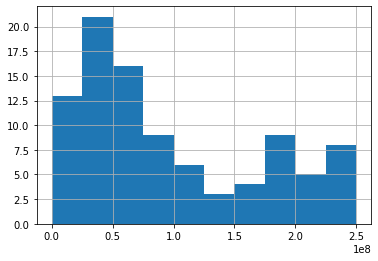

In [4223]:
df_imdb['budget'].hist()

### Columna `duration`

In [4224]:
df_imdb['duration'].isna().sum()

0

In [4225]:
# Sustituimos un valor negativo y dos anormalmente grandes que teniamos por la mediana que es menos sensible a outliers, al ser tan pocos podriamos haber buscado la duración en internet.
df_imdb.loc[(df_imdb.duration < 0) | (df_imdb.duration > 400), 'duration'] = df_imdb.duration.median()

## Guardar dataset

In [4226]:
df_imdb.to_csv('imdb_limpio.csv', index = False)

### Columna `movie_title`

In [4227]:
df_imdb['movie_title'].value_counts(dropna = False)

unbroken                   2
les misérables             2
ben-hur                    2
the wolf of wall street    1
get on up                  1
                          ..
lincoln                    1
exodus: gods and kings     1
the martian                1
the amazing spider-man     1
jersey boys                1
Name: movie_title, Length: 91, dtype: int64

In [4228]:
df_imdb['movie_title'].isna().sum()

0

In [4229]:
df_imdb['movie_title'].str.strip().str.capitalize()

0                 The wolf of wall street
1                              Iron man 3
2                       The hateful eight
3                                Margaret
4     The hobbit: the desolation of smaug
                     ...                 
94                       12 years a slave
95                       Barney's version
96                       Captain phillips
97                                   Fury
98                            Jersey boys
Name: movie_title, Length: 94, dtype: object

### Columna `title_year`

In [4230]:
df_imdb['title_year'].value_counts(dropna = False)

 2014    22
 2012    19
 2013    17
 2011    10
 2015     8
 2010     7
 2016     6
 202      1
-1000     1
 2030     1
 1800     1
 205      1
Name: title_year, dtype: int64

In [4231]:
df_imdb['title_year'].replace([202,205,2030,1800,-1000],[2012,2015,2003,'no info','no info'],inplace = True)

In [4232]:
df_imdb['title_year'].value_counts(dropna= False)

2014       22
2012       20
2013       17
2011       10
2015        9
2010        7
2016        6
no info     2
2003        1
Name: title_year, dtype: int64

### Columna `movie_twitter_likes`

In [4233]:
df_imdb['movie_twitter_likes']


0     1000
1     1000
2     1000
3     1000
4     1000
      ... 
94    1000
95    1000
96    1000
97    1000
98    1000
Name: movie_twitter_likes, Length: 94, dtype: int64

In [4234]:
df_imdb['movie_twitter_likes'].value_counts(dropna = False)

1000    94
Name: movie_twitter_likes, dtype: int64

In [4235]:
df_imdb.drop(columns='movie_twitter_likes',inplace=True)

In [4236]:
df_imdb.columns

Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes', 'genre_0', 'genre_1', 'genre_2', 'genre_3',
       'genre_4'],
      dtype='object')

### Columna `imdb_score`

In [4237]:
df_imdb['imdb_score'].unique()

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([ 8.2,  7.2,  7.9,  6.5,  6.9,  8.1, -7.5,  7.8,  5.6,  8.6,  8. ,
        8.5,  5.7,  7.5,  7.6,  7.4,  6.7,  6.3,  7. ,  6.1,  6.8,  8.4,
        8.8,  4.3,  7.1,  7.3,  3. ,  6. ,  5.8,  5.3,  6.4,  6.6, -1.2,
        5.9,  8.7])

In [4238]:
#no se que hacer con los negativos. Creo que lo apropiado es poner la media o en valor absoluto, pero en una situacion de la vida real llamaria a los responsables de los datos
df_imdb['imdb_score'] = df_imdb['imdb_score'].abs()
df_imdb['imdb_score'].value_counts()

6.7    9
8.1    8
7.3    7
7.2    6
7.9    5
      ..
6.4    1
5.6    1
1.2    1
5.9    1
8.7    1
Name: imdb_score, Length: 34, dtype: int64

### Columna `country`

In [4239]:
df_imdb['country'].value_counts(dropna = False)

USA               75
UK                 6
usa                3
France             2
Germany            1
New Zealand        1
India              1
United States      1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

In [4240]:
df_imdb['country'].replace(['usa','United States'],'USA',inplace = True)

In [4241]:
df_imdb['country'].value_counts(dropna= False)

USA               79
UK                 6
France             2
Germany            1
New Zealand        1
India              1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

### Columna `language`

In [4242]:
df_imdb['language'].unique()

array(['English'], dtype=object)

In [4243]:
df_imdb['language'].value_counts(dropna = False)

English    94
Name: language, dtype: int64

In [4244]:
assert (df_imdb['language'] == 'English').all()

In [4245]:
df_imdb.drop(columns='language', inplace=True)

### Columna `movie_facebook_likes`

In [4246]:
df_imdb['movie_facebook_likes'].describe()

count        94.000000
mean      65633.244681
std       58702.022178
min           0.000000
25%       24500.000000
50%       54000.000000
75%       84500.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

In [4247]:
df_imdb['movie_facebook_likes'].value_counts(dropna = False)

0         8
82000     3
144000    2
56000     2
27000     2
         ..
146000    1
5000      1
95000     1
85000     1
31000     1
Name: movie_facebook_likes, Length: 67, dtype: int64

In [4248]:
for i in  df_imdb['movie_facebook_likes']:
    if i < 0:
        df_imdb[f'movie_facebook_likes_{i}'.format(i).abs()] 
    else:
        continue



In [4249]:
assert df_imdb['movie_facebook_likes'].isna().sum() == 0


In [4250]:
assert df_imdb['movie_facebook_likes'].min() >= 0


### Columna `actors`

In [4251]:
df_imdb['actors'].isna().any().sum()

0

In [4252]:
actores_unicos = []
actores_total = []
for i in df_imdb['actors'].str.split(','):
    for j in i:
        if j not in actores_unicos:
            actores_unicos.append(j)
actores_unicos

for i in df_imdb['actors'].str.split(','):
    for j in i:
            actores_total.append(j)
actores_total

['Leonardo DiCaprio',
 'Matthew McConaughey',
 'Jon Favreau',
 'Robert Downey Jr.',
 'Jon Favreau',
 'Don Cheadle',
 'Craig Stark',
 'Jennifer Jason Leigh',
 'Zoë Bell',
 'Matt Damon',
 'Kieran Culkin',
 'John Gallagher Jr.',
 'Aidan Turner',
 'Adam Brown',
 'James Nesbitt',
 'Henry Cavill',
 'Lauren Cohan',
 'Alan D. Purwin',
 'Aidan Turner',
 'Adam Brown',
 'James Nesbitt',
 'Rufus Sewell',
 'Hayley Atwell',
 'Charlotte Rampling',
 'Chris Hemsworth',
 'Robert Downey Jr.',
 'Scarlett Johansson',
 'Tom Hanks',
 'Jim Sturgess',
 'Jim Broadbent',
 'Robin Wright',
 'Goran Visnjic',
 'Joely Richardson',
 'Roma Downey',
 'Amber Rose Revah',
 'Darwin Shaw',
 'Matthew McConaughey',
 'Anne Hathaway',
 'Mackenzie Foy',
 'Aldis Hodge',
 'Neil Brown Jr.',
 'R. Marcos Taylor',
 'Ellar Coltrane',
 'Lorelei Linklater',
 'Libby Villari',
 'Leonardo DiCaprio',
 'Christoph Waltz',
 'Ato Essandoh',
 'Bingbing Li',
 'Sophia Myles',
 'Kelsey Grammer',
 'Tom Hardy',
 'Christian Bale',
 'Joseph Gordon-Levit

In [4253]:
pd.Series(actores_total).value_counts().sort_values(ascending = False)

Leonardo DiCaprio     7
Jennifer Lawrence     6
Robert Downey Jr.     5
Tom Hardy             5
Hugh Jackman          5
                     ..
Shane Hartline        1
James Martin Kelly    1
Stephen Graham        1
Sam Claflin           1
Scott Vance           1
Length: 209, dtype: int64

In [4254]:
#Para buscar un actor en concreto
actores_dicaprio = df_imdb.groupby('actors')['actors'].apply(lambda x: x.str.contains('Leonardo DiCaprio')).sum()
actores_dicaprio


7

In [4255]:
df_imdb['actors'].head(10)

0     Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1             Robert Downey Jr.,Jon Favreau,Don Cheadle
2             Craig Stark,Jennifer Jason Leigh,Zoë Bell
3           Matt Damon,Kieran Culkin,John Gallagher Jr.
4                 Aidan Turner,Adam Brown,James Nesbitt
5              Henry Cavill,Lauren Cohan,Alan D. Purwin
6                 Aidan Turner,Adam Brown,James Nesbitt
7         Rufus Sewell,Hayley Atwell,Charlotte Rampling
8     Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...
10                 Tom Hanks,Jim Sturgess,Jim Broadbent
Name: actors, dtype: object

In [4256]:
df_imdb['actors'] = df_imdb['actors'].str.split(',')

In [4257]:
df_imdb = df_imdb.explode('actors')
df_imdb.reset_index(inplace = True)

In [4258]:
df_imdb.head()

,index,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes,genre_0,genre_1,genre_2,genre_3,genre_4
0,0,Color,Martin Scorsese,240.0,116866727,Biography|Comedy|Crime|Drama,the wolf of wall street,2013,USA,100000000,8.2,Leonardo DiCaprio,138000,Biography,Comedy,Crime,Drama,NaN
1,0,Color,Martin Scorsese,240.0,116866727,Biography|Comedy|Crime|Drama,the wolf of wall street,2013,USA,100000000,8.2,Matthew McConaughey,138000,Biography,Comedy,Crime,Drama,NaN
2,0,Color,Martin Scorsese,240.0,116866727,Biography|Comedy|Crime|Drama,the wolf of wall street,2013,USA,100000000,8.2,Jon Favreau,138000,Biography,Comedy,Crime,Drama,NaN
3,1,Color,Shane Black,195.0,408992272,Action|Adventure|Sci-Fi,iron man 3,2013,USA,200000000,7.2,Robert Downey Jr.,95000,Action,Adventure,Sci-Fi,NaN,NaN
4,1,Color,Shane Black,195.0,408992272,Action|Adventure|Sci-Fi,iron man 3,2013,USA,200000000,7.2,Jon Favreau,95000,Action,Adventure,Sci-Fi,NaN,NaN
